<a href="https://colab.research.google.com/github/jbakery/Python-Portfolio/blob/main/Movie_correlation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns
import io
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Upload data
from google.colab import files
uploaded = files.upload()

In [ ]:
#Read in the data

df = pd.read_csv('movies.csv')

In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
# Testing for null values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [ ]:
#Converting data types, removing decimal place

df = df.fillna(0)
df.budget.astype(int)
df.gross.astype(int)

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [ ]:
#Create correct year column

df['yearcorrect'] = df['released'].astype(str).str[:4]

In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [ ]:
#Sorting data highest Gross revenue to least

df.sort_values(by=['gross'], inplace=False, ascending=False).head

<bound method NDFrame.head of       name  rating  genre  year  ...       gross  company  runtime  yearcorrect
5445   533       6      0  2009  ...  2847246203     2254    162.0           31
7445   535       6      0  2019  ...  2797501328     1607    181.0           41
3045  6896       6      6  1997  ...  2201647264     2254    194.0           19
6663  5144       6      0  2015  ...  2069521700     1541    138.0           37
7244   536       6      0  2018  ...  2048359754     1607    149.0           40
...    ...     ...    ...   ...  ...         ...      ...      ...          ...
1617  3712       7      5  1989  ...           0     1160     92.0           12
1614  1745       7     10  1989  ...           0      147     85.0           11
1606  2691       7      8  1989  ...           0     2238     89.0           11
1601  3836       0      4  1989  ...           0      505    104.0           12
7667  5394       0     10  2020  ...           0     1788    102.0           42

[7668 row

In [ ]:
#Displaying full data frame

pd.set_option('display.max_rows',None)

In [ ]:
#Drop any duplicates

df['company'].drop_duplicates().head

<bound method NDFrame.head of 0       2320
1        732
2       1541
3       1813
4       1778
        ... 
7658    1749
7660      84
7661     885
7665     942
7667    1788
Name: company, Length: 2386, dtype: int16>

In [ ]:
# Hypothesis

# Budget has a high correlation with Gross Revenue
# Company has a high correlation with Gross Revenue



<function matplotlib.pyplot.show>

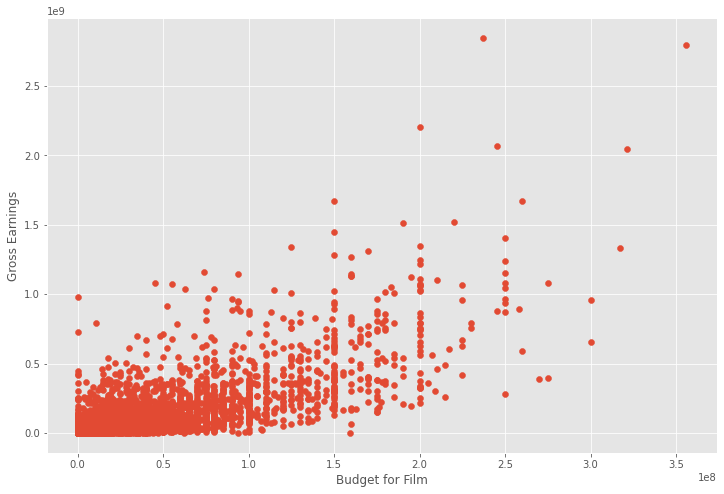

In [ ]:
# Scatter plot Budget Vs Gross Revenue

plt.scatter(x=df['budget'], y=df['gross'])

plt.title=('Budget Vs Gross Earnings')

plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

plt.show

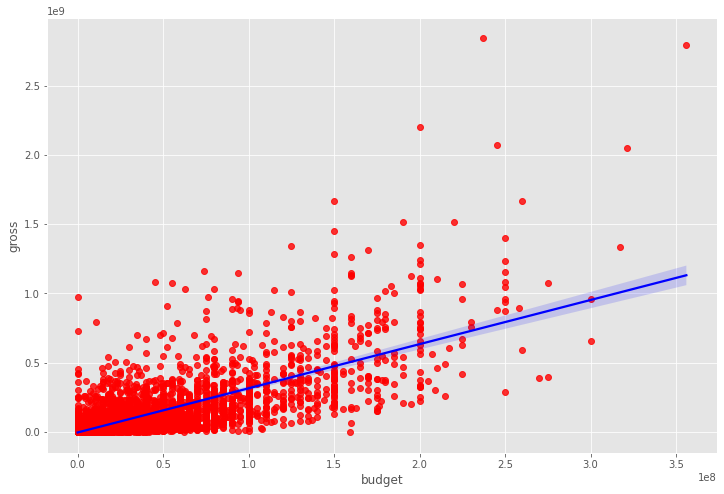

In [ ]:
# Plot budget vs grosss using seaborn

sns.regplot(x='budget', y='gross',data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [ ]:
# Let's start looking at correlation

In [ ]:
df.corr(method='pearson') #Pearson Correlation Method

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


In [ ]:
df.corr(method='kendall') # Kendall Correlation Method

,year,score,votes,budget,gross,runtime
year,1.000000,0.066796,0.330410,0.209304,0.216595,0.096390
score,0.066796,1.000000,0.300673,-0.004843,0.091331,0.283601
votes,0.330410,0.300673,1.000000,0.439883,0.560449,0.197697
budget,0.209304,-0.004843,0.439883,1.000000,0.541956,0.176184
gross,0.216595,0.091331,0.560449,0.541956,1.000000,0.177429
runtime,0.096390,0.283601,0.197697,0.176184,0.177429,1.000000


In [ ]:
df.corr(method='spearman') # Spearman Correlation Method

,year,score,votes,budget,gross,runtime
year,1.000000,0.097757,0.468107,0.291152,0.314681,0.141805
score,0.097757,1.000000,0.428810,-0.007002,0.133564,0.399868
votes,0.468107,0.428810,1.000000,0.604693,0.752550,0.289359
budget,0.291152,-0.007002,0.604693,1.000000,0.716816,0.246941
gross,0.314681,0.133564,0.752550,0.716816,1.000000,0.257478
runtime,0.141805,0.399868,0.289359,0.246941,0.257478,1.000000


In [ ]:
# High correlation between budget and gross
# I was right

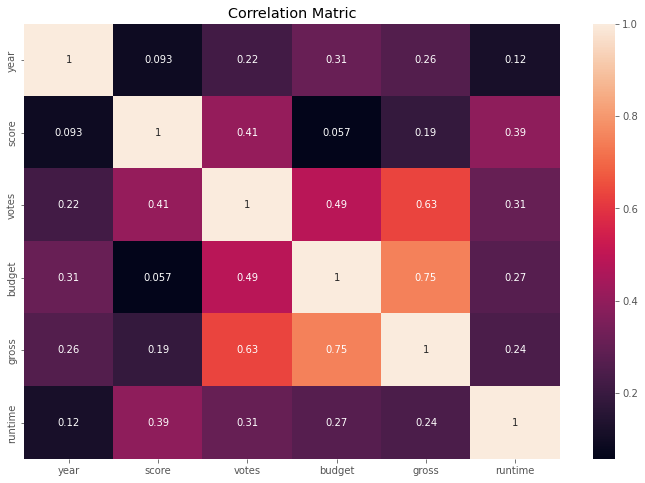

In [ ]:
from importlib import reload
reload(plt)

correlation_matrix = df.corr(method='pearson')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.title('Correlation Matric')



sns.heatmap(correlation_matrix, annot=True)

plt.show()

In [ ]:
#Look at company correlation

df_numerized = df

for col_name in df_numerized.columns: 
  if(df_numerized[col_name].dtype == 'object'): 
     df_numerized[col_name] = df_numerized[col_name].astype('category')
     df_numerized[col_name] = df_numerized[col_name].cat.codes

pd.set_option('display.max_rows', 100)
df_numerized


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,7,6,1980,25,8.4,927000.0,2589,4015,1048,55,19000000,46998772,2320,146.0,2
1,5573,7,1,1980,29,5.8,65000.0,2269,1633,328,56,4500000,58853106,732,104.0,2
2,5142,5,0,1980,26,8.7,1200000.0,1111,2568,1746,56,18000000,538375067,1541,124.0,2
3,286,5,4,1980,29,7.7,221000.0,1301,2001,2247,56,3500000,83453539,1813,88.0,2
4,1027,7,4,1980,33,7.3,108000.0,1054,522,411,56,6000000,39846344,1778,98.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,0,6,2020,2943,3.1,18.0,1500,2290,2422,56,7000,0,0,90.0,42
7664,1678,0,4,2020,2926,4.7,36.0,774,2615,1887,56,0,0,540,90.0,42
7665,4717,0,6,2020,2933,5.7,29.0,2061,2684,2041,56,58750,0,942,0.0,42
7666,2843,0,6,2020,2942,0.0,0.0,1184,1825,451,56,15000,0,0,120.0,42


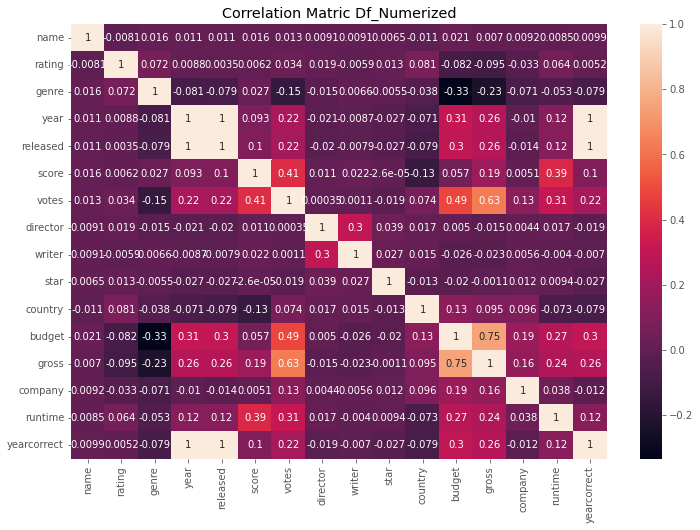

In [ ]:
correlation_matrix = df_numerized.corr(method='pearson')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.title('Correlation Matric Df_Numerized')



sns.heatmap(correlation_matrix, annot=True)

plt.show()

In [ ]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()

corr_pairs.head


<bound method NDFrame.head of name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released       0.010696
                              ...   
yearcorrect  budget         0.300835
             gross          0.255530
             company       -0.012447
             runtime        0.120596
             yearcorrect    1.000000
Length: 256, dtype: float64>

In [ ]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head

<bound method NDFrame.head of budget       genre         -0.334021
genre        budget        -0.334021
             gross         -0.234297
gross        genre         -0.234297
votes        genre         -0.145296
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64>

In [ ]:
high_corr = sorted_pairs[(sorted_pairs)> 0.5]

high_corr.head

<bound method NDFrame.head of gross        votes          0.632870
votes        gross          0.632870
gross        budget         0.750157
budget       gross          0.750157
year         yearcorrect    0.995240
yearcorrect  year           0.995240
released     year           0.995343
year         released       0.995343
released     yearcorrect    0.999308
yearcorrect  released       0.999308
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: f

In [ ]:
#Votes and Budget have the highest correlation to gross earnings
#Company has low correlation
#I was wrong